In [15]:
import pandas as pd
filename = 'Iris.csv'
df = pd.read_csv(filename)

In [16]:
df



,1,5.1,3.5,1.4,0.2,Iris-setosa
0,2,4.9,3.0,1.4,0.2,Iris-setosa
1,3,4.7,3.2,1.3,0.2,Iris-setosa
2,4,4.6,3.1,1.5,0.2,Iris-setosa
3,5,5.0,3.6,1.4,0.2,Iris-setosa
4,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output



In [21]:
#read Iris.csv
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv('Iris.csv', names=names)

#show dataset info
print(dataset.describe())
print('')
print(dataset.groupby('class').size())


       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


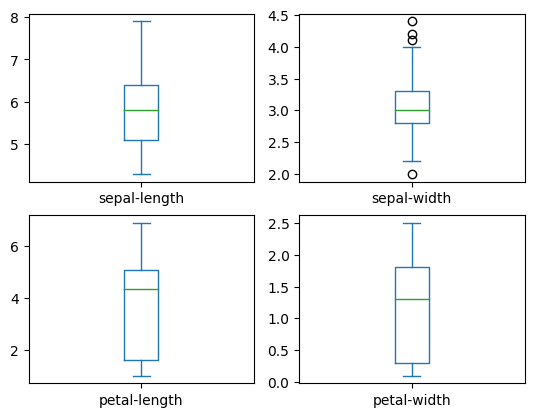

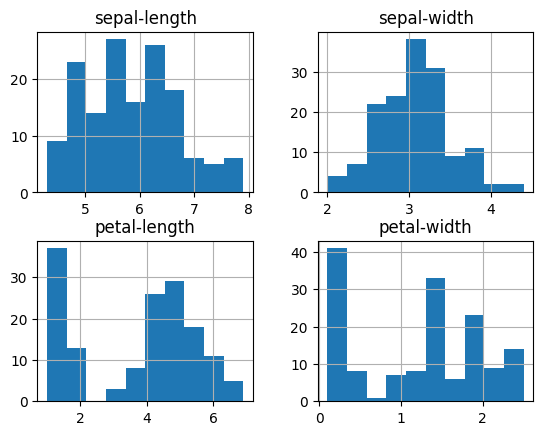

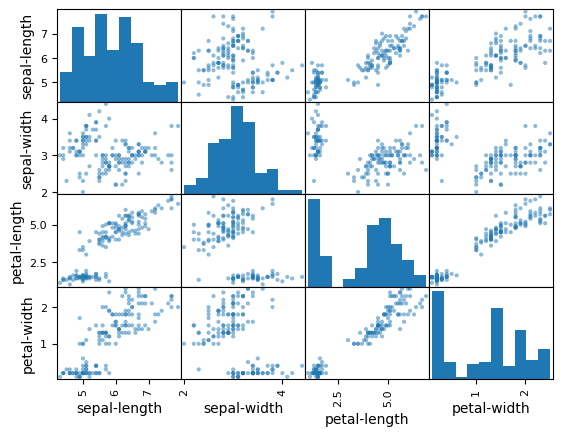

In [22]:
#data viz

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histograms
dataset.hist()
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [23]:
# Split-out validation dataset
array = dataset.values
iris = datasets.load_iris()
X = iris.data[:,0:2]
Y_d = iris.target
#X = array[:,0:4]
#yN = array[:,4]
Y = label_binarize(Y_d, classes=[0, 1, 2])
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y,
                                                                                test_size=validation_size,
                                                                                random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

Average precision score, micro-averaged over all classes: 0.72


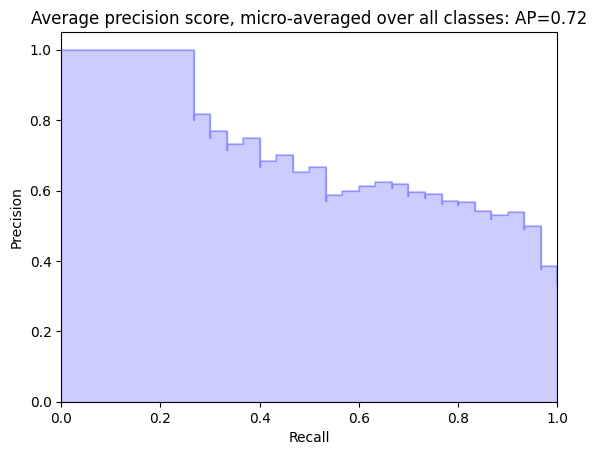

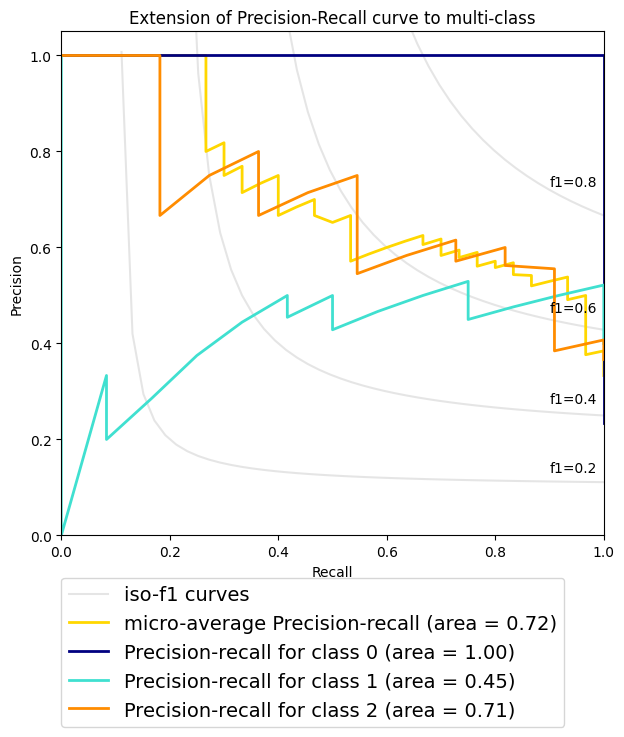

<ipython-input-25-fb6fc8203c7f>:101: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


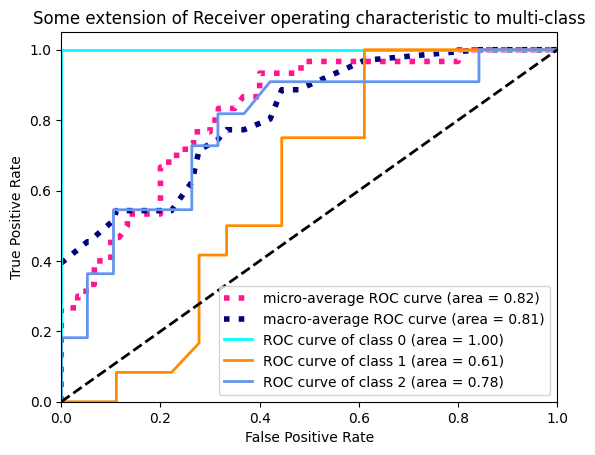

In [25]:
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, Y_train)

if hasattr(classifier, "predict_proba"):
    y_score = classifier.predict_proba(X_validation)
else:
    y_score = classifier.decision_function(X_validation)

lw = 2

# For each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(0,3):
    precision[i], recall[i], _ = precision_recall_curve(Y_validation[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_validation[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_validation.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_validation, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []

for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=lw)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(0, 3), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=lw)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()

# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(0, 3):
    fpr[i], tpr[i], _ = roc_curve(Y_validation[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_validation.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, 3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0, 3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(0, 3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()